<a href="https://colab.research.google.com/github/Yishun-Wang/Coursera_Capstone/blob/main/week_3_all.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Week3-part1 

In [51]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
url='https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'

url = requests.get('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M').text
soup = BeautifulSoup(url,'lxml')

table_contents=[]
table=soup.find('table')
for row in table.findAll('td'):
    cell = {}
    if row.span.text=='Not assigned':
        pass
    else:
        cell['PostalCode'] = row.p.text[:3]
        cell['Borough'] = (row.span.text).split('(')[0]
        cell['Neighborhood'] = (((((row.span.text).split('(')[1]).strip(')')).replace(' /',',')).replace(')',' ')).strip(' ')
        table_contents.append(cell)

# print(table_contents)
df=pd.DataFrame(table_contents)
df['Borough']=df['Borough'].replace({'Downtown TorontoStn A PO Boxes25 The Esplanade':'Downtown Toronto Stn A',
                                             'East TorontoBusiness reply mail Processing Centre969 Eastern':'East Toronto Business',
                                             'EtobicokeNorthwest':'Etobicoke Northwest','East YorkEast Toronto':'East York/East Toronto',
                                             'MississaugaCanada Post Gateway Processing Centre':'Mississauga'})

df.shape

(103, 3)

Week-3 part 2 

In [5]:
from google.colab import files
uploaded = files.upload()

Saving Geospatial_Coordinates.csv to Geospatial_Coordinates.csv


In [65]:
new_df = pd.read_csv ('Geospatial_Coordinates.csv')
new_df.columns = ['Postcode', 'Latitude', 'Longitude']
new_df.head()
df.head()
postcode= new_df['Postcode']

df.head()
# if 'M3A' in list(df['PostalCode']):
#   print(True)

df.rename(columns={"PostalCode": "Postcode"},inplace=True)
df.head()

df_pos = pd.merge(df, new_df, on=['Postcode'], how='inner')
df_pos
df_pos['Longitude']

0     -79.329656
1     -79.315572
2     -79.360636
3     -79.464763
4     -79.389494
         ...    
98    -79.506944
99    -79.383160
100   -79.321558
101   -79.498509
102   -79.520999
Name: Longitude, Length: 103, dtype: float64

Week3-part3

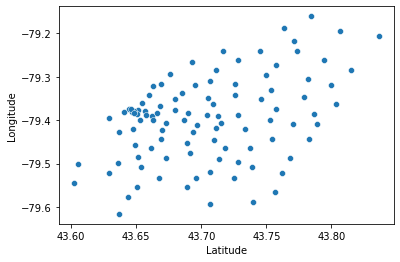

In [54]:
import seaborn as sns

sns.scatterplot(data=df_pos, x="Latitude", y="Longitude")

As can be seen from the above figure, I will use K-mean to cluster 

In [68]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


First we need to find the suitbale K value 




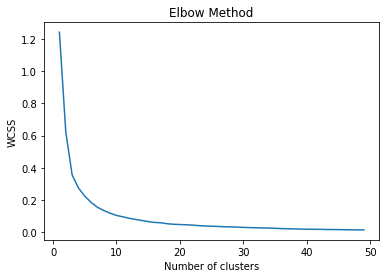

In [76]:
data = [df_pos["Latitude"], df_pos['Longitude']]

headers = ["Latitude", "Longtitude"]

df3 = pd.concat(data, axis=1, keys=headers)
df3['Longtitude']
wcss = []
for i in range(1, 50):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df3)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 50), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

The above shows that K should be at least 18 , then we set K =18 , nest we perfrom clustering

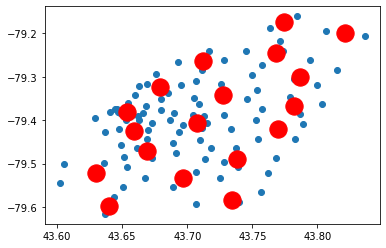

In [80]:
kmeans = KMeans(n_clusters=18, init='k-means++', max_iter=500, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(df3)
l=df3['Longtitude']
plt.scatter(df3['Latitude'], df3['Longtitude'])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

The above are given k 